In [12]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')

In [7]:
(train_img,train_labels), (test_img,test_labels) = fashion_mnist.load_data()
x = test_img
y = test_labels

In [8]:
x.shape

(10000, 28, 28)

In [14]:
train_img.shape[0]

60000

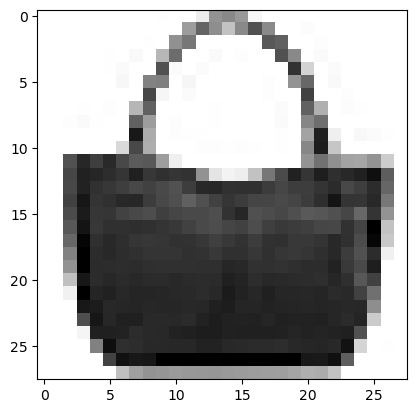

Số này là: 8


In [9]:
fashion = train_img[100]
plt.imshow(fashion, cmap = plt.cm.binary)
plt.show()
print('Số này là:', train_labels[200])

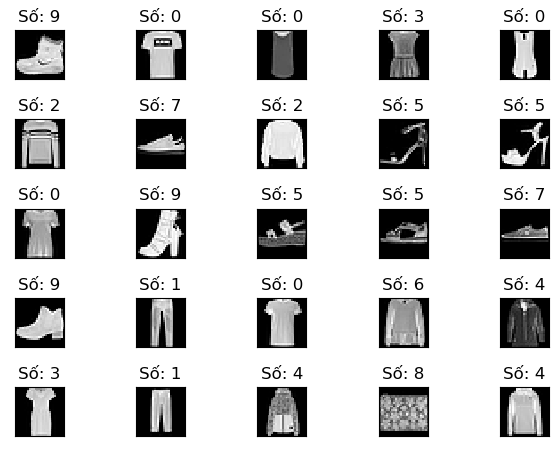

In [10]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_img[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
train_imgs = train_img.reshape(train_img.shape[0],-1)
train_img = train_imgs.astype('float32')/255

test_imgs = test_img.reshape(test_img.shape[0],-1)
test_imgs = test_imgs.astype('float32')/255

In [18]:
train_labels= to_categorical(train_labels,10) #one hot encoding
test_labels = to_categorical(test_labels,10)

In [25]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (784,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_imgs,train_labels,epochs = 30, batch_size = 128)
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('Mất mát: ', test_loss)
print("Độ chính xác: ", test_acc)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.5572 - accuracy: 0.8014
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3846 - accuracy: 0.8590
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3415 - accuracy: 0.8740
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3143 - accuracy: 0.8845
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2935 - accuracy: 0.8922
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2796 - accuracy: 0.8958
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2650 - accuracy: 0.9004
Epoch 8/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2551 - accuracy: 0.9051
Epoch 9/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2436 - accuracy: 0.9090
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2365 - accuracy: 0.9112

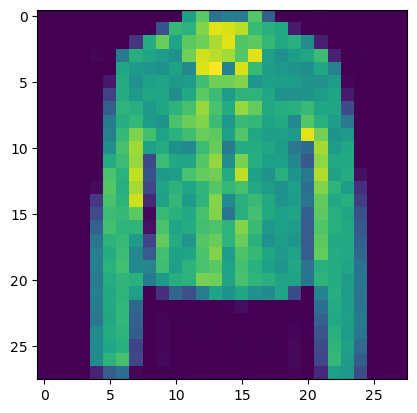

Kết quả là:  4


In [29]:
img_test = x[10]
plt.imshow(img_test)
plt.show()
print("Kết quả là: ",y[10])

In [30]:
x_pred = x[10].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255
np.argmax(model.predict(x_pred),axis = -1)

1/1 [==============================] - 0s 15ms/step


array([4])